In [1]:
import pandas as pd
import numpy as np

In [2]:
from log_progress import log_progress

In [3]:
import matplotlib
%matplotlib inline

In [4]:
import seaborn as sns

# Test Public

In [5]:
public_test_df = pd.read_csv('data/test-public.txt', sep='\t', index_col='Id')
public_test_df.head()

,Source,Sink
Id,,
1,2184483,1300190
2,3151356,1452193
3,1579396,193159
4,1406432,2481036
5,2389638,593017


In [6]:
source_set = set(public_test_df.Source.values)
sink_set = set(public_test_df.Sink.values)
len(sink_set), len(source_set), len(source_set.intersection(sink_set))

(1978, 2000, 30)

In [7]:
len(source_set.intersection(sink_set))

30

In [8]:
test_set = source_set.union(sink_set)

# Train data load

## Labels Dataframe

In [9]:
labels_df = pd.read_csv('data/labels.csv', names=['Source', 'Sink', 'label'], header=1)
labels_df.head()

,Source,Sink,label
0,1708247,2618948,0
1,59864,4731068,0
2,4368587,3448751,0
3,3326044,849778,0
4,2726590,2072810,0


## Nodes Dataframe

In [10]:
nodes_df = pd.read_csv('data/node_features.v2.csv', index_col='node_id')
nodes_df.head()

/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,is_leaf_node,parent_non_leaf_descendants_count,parent_leaf_descendans_count,parent_descendants_count,parents_count,sink_parents_link_count
node_id,,,,,,
0,1,2016,230193,232209,3,0.0
1,1,2729,34155,36884,3,0.0
2,1,5224,769858,775082,2,0.0
3,1,814,14715,15529,2,0.0
4,1,1085,7925,9010,3,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114b9fe10>,
      dtype=object)

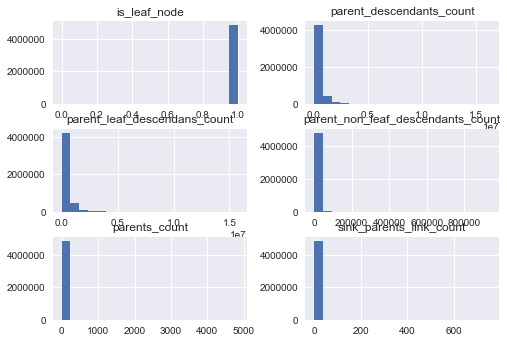

In [11]:
nodes_df.hist(bins=20)

# Join data

In [12]:
public_test_df.head()

,Source,Sink
Id,,
1,2184483,1300190
2,3151356,1452193
3,1579396,193159
4,1406432,2481036
5,2389638,593017


In [13]:
labels_df.head()

,Source,Sink,label
0,1708247,2618948,0
1,59864,4731068,0
2,4368587,3448751,0
3,3326044,849778,0
4,2726590,2072810,0


In [23]:
X_train = pd.concat([labels_df, public_test_df], sort=False).reset_index(drop=True).fillna(-1).astype(int)

columns = ['is_leaf_node', 'parent_non_leaf_descendants_count', 'parent_leaf_descendans_count', 
           'parents_count']
X_train = X_train.join(nodes_df[columns], on='Sink')

In [24]:
X_train.head()

,Source,Sink,label,is_leaf_node,parent_non_leaf_descendants_count,parent_leaf_descendans_count,parents_count
0,1708247,2618948,0,1,405,27236,2
1,59864,4731068,0,1,5276,809666,2
2,4368587,3448751,0,1,2448,6233,3
3,3326044,849778,0,1,1665,507780,1
4,2726590,2072810,0,1,1520,369384,1


In [22]:
X_train.parent_leaf_descendans_count.value_counts()

0          240
1           73
5           42
64          41
4           37
33          19
2450        17
19          15
2           14
22          14
60          14
42           9
220          9
578          9
121          9
52           9
172          9
131          8
102          8
1786387      7
372          7
783          7
1590         7
1380         7
120          7
12           7
184          7
440          7
1736         7
9            7
          ... 
1764597      1
2333947      1
3382034      1
5778701      1
7447597      1
156080       1
2242015      1
41923        1
8658826      1
1156         1
1768759      1
533820       1
77117        1
771392       1
1123003      1
1115183      1
21842        1
25940        1
1643936      1
802616       1
52577        1
2375023      1
288116       1
3449         1
171387       1
603518       1
3888530      1
269723       1
276670       1
5902334      1
Name: parent_leaf_descendans_count, Length: 12538, dtype: int64

In [21]:
nodes_df.head()

,is_leaf_node,parent_non_leaf_descendants_count,parent_leaf_descendans_count,parent_descendants_count,parents_count,sink_parents_link_count
node_id,,,,,,
0,1,2016,230193,232209,3,0.0
1,1,2729,34155,36884,3,0.0
2,1,5224,769858,775082,2,0.0
3,1,814,14715,15529,2,0.0
4,1,1085,7925,9010,3,0.0


In [138]:
labels_df.join()

,is_parent_node,is_leaf_node,parents_count,children_count,children_links_counts,parents_links_counts
node_id,,,,,,
0,0,1,0.602060,0.0,0.0,0.0
1,0,1,0.602060,0.0,0.0,0.0
2,0,1,0.477121,0.0,0.0,0.0
3,0,1,0.477121,0.0,0.0,0.0
4,0,1,0.602060,0.0,0.0,0.0


In [139]:
source_columns = ['parents_count', 'children_count', 'children_links_counts', 'parents_links_counts']
train_df = public_test_df.join(nodes_df[source_columns],
                    on='Source', rsuffix='source')

In [142]:
train_df.head()

,Source,Sink,parents_count,children_count,children_links_counts,parents_links_counts
Id,,,,,,
1,2184483,1300190,2.012837,1.924279,4.875929,5.376955
2,3151356,1452193,1.602060,2.532754,5.280337,4.929184
3,1579396,193159,1.146128,2.320146,5.591061,5.514225
4,1406432,2481036,1.230449,1.929419,4.499151,4.475904
5,2389638,593017,1.491362,2.428135,5.164418,5.594076


In [146]:
train_df[train_df.parents_links_counts > 0].shape

(1953, 6)

In [147]:
sink_columns = ['is_parent_node', 'is_leaf_node', 'parents_count',
                  'children_count', 'children_links_counts', 'parents_links_counts']
train_df = train_df.join(nodes_df[sink_columns], on='Sink', rsuffix='_sink')

In [148]:
train_df.head()

,Source,Sink,parents_count,children_count,children_links_counts,parents_links_counts,is_parent_node,is_leaf_node,parents_count_sink,children_count_sink,children_links_counts_sink,parents_links_counts_sink
Id,,,,,,,,,,,,
1,2184483,1300190,2.012837,1.924279,4.875929,5.376955,0,1,0.602060,0.000000,0.000000,0.000000
2,3151356,1452193,1.602060,2.532754,5.280337,4.929184,0,1,2.462398,0.000000,0.000000,0.000000
3,1579396,193159,1.146128,2.320146,5.591061,5.514225,0,1,0.477121,0.000000,0.000000,0.000000
4,1406432,2481036,1.230449,1.929419,4.499151,4.475904,1,0,1.397940,1.176091,2.466868,3.132900
5,2389638,593017,1.491362,2.428135,5.164418,5.594076,1,0,2.220108,1.770852,4.629888,5.243883


In [150]:
train_df[train_df.children_count_sink > 0].shape

(369, 12)

In [151]:
nodes_df.head()

,is_parent_node,is_leaf_node,parents_count,children_count,children_links_counts,parents_links_counts
node_id,,,,,,
0,0,1,0.602060,0.0,0.0,0.0
1,0,1,0.602060,0.0,0.0,0.0
2,0,1,0.477121,0.0,0.0,0.0
3,0,1,0.477121,0.0,0.0,0.0
4,0,1,0.602060,0.0,0.0,0.0


In [161]:
nodes_df[(nodes_df.parents_count < 1e-10)].shape

(0, 6)

In [157]:
nodes_df[(nodes_df.parents_count > 0) & (train_df.children_count > 0)].shape#, nodes_df.shape

(2000, 6)

In [156]:
nodes_df[(nodes_df.is_leaf_node == 1) & (nodes_df.parents_count > 0)].shape

(4847136, 6)

In [106]:
mask = (train_df.children_count_sink > 0)# | (train_df.parents_count_sink > 100)

In [107]:
train_df['prediction'] = mask.astype(int)

In [108]:
train_df.set_index(['Source', 'Sink'], inplace=True, append=True)
train_df.head()

,,,parents_count,children_count,children_links_counts,parents_links_counts,is_parent_node,is_leaf_node,parents_count_sink,children_count_sink,children_links_counts_sink,parents_links_counts_sink,prediction
Id,Source,Sink,,,,,,,,,,,
1,2184483,1300190,2.012837,1.924279,4.875929,5.376955,0,1,0.602060,0.000000,0.000000,0.000000,0
2,3151356,1452193,1.602060,2.532754,5.280337,4.929184,0,1,2.462398,0.000000,0.000000,0.000000,0
3,1579396,193159,1.146128,2.320146,5.591061,5.514225,0,1,0.477121,0.000000,0.000000,0.000000,0
4,1406432,2481036,1.230449,1.929419,4.499151,4.475904,1,0,1.397940,1.176091,2.466868,3.132900,1
5,2389638,593017,1.491362,2.428135,5.164418,5.594076,1,0,2.220108,1.770852,4.629888,5.243883,1


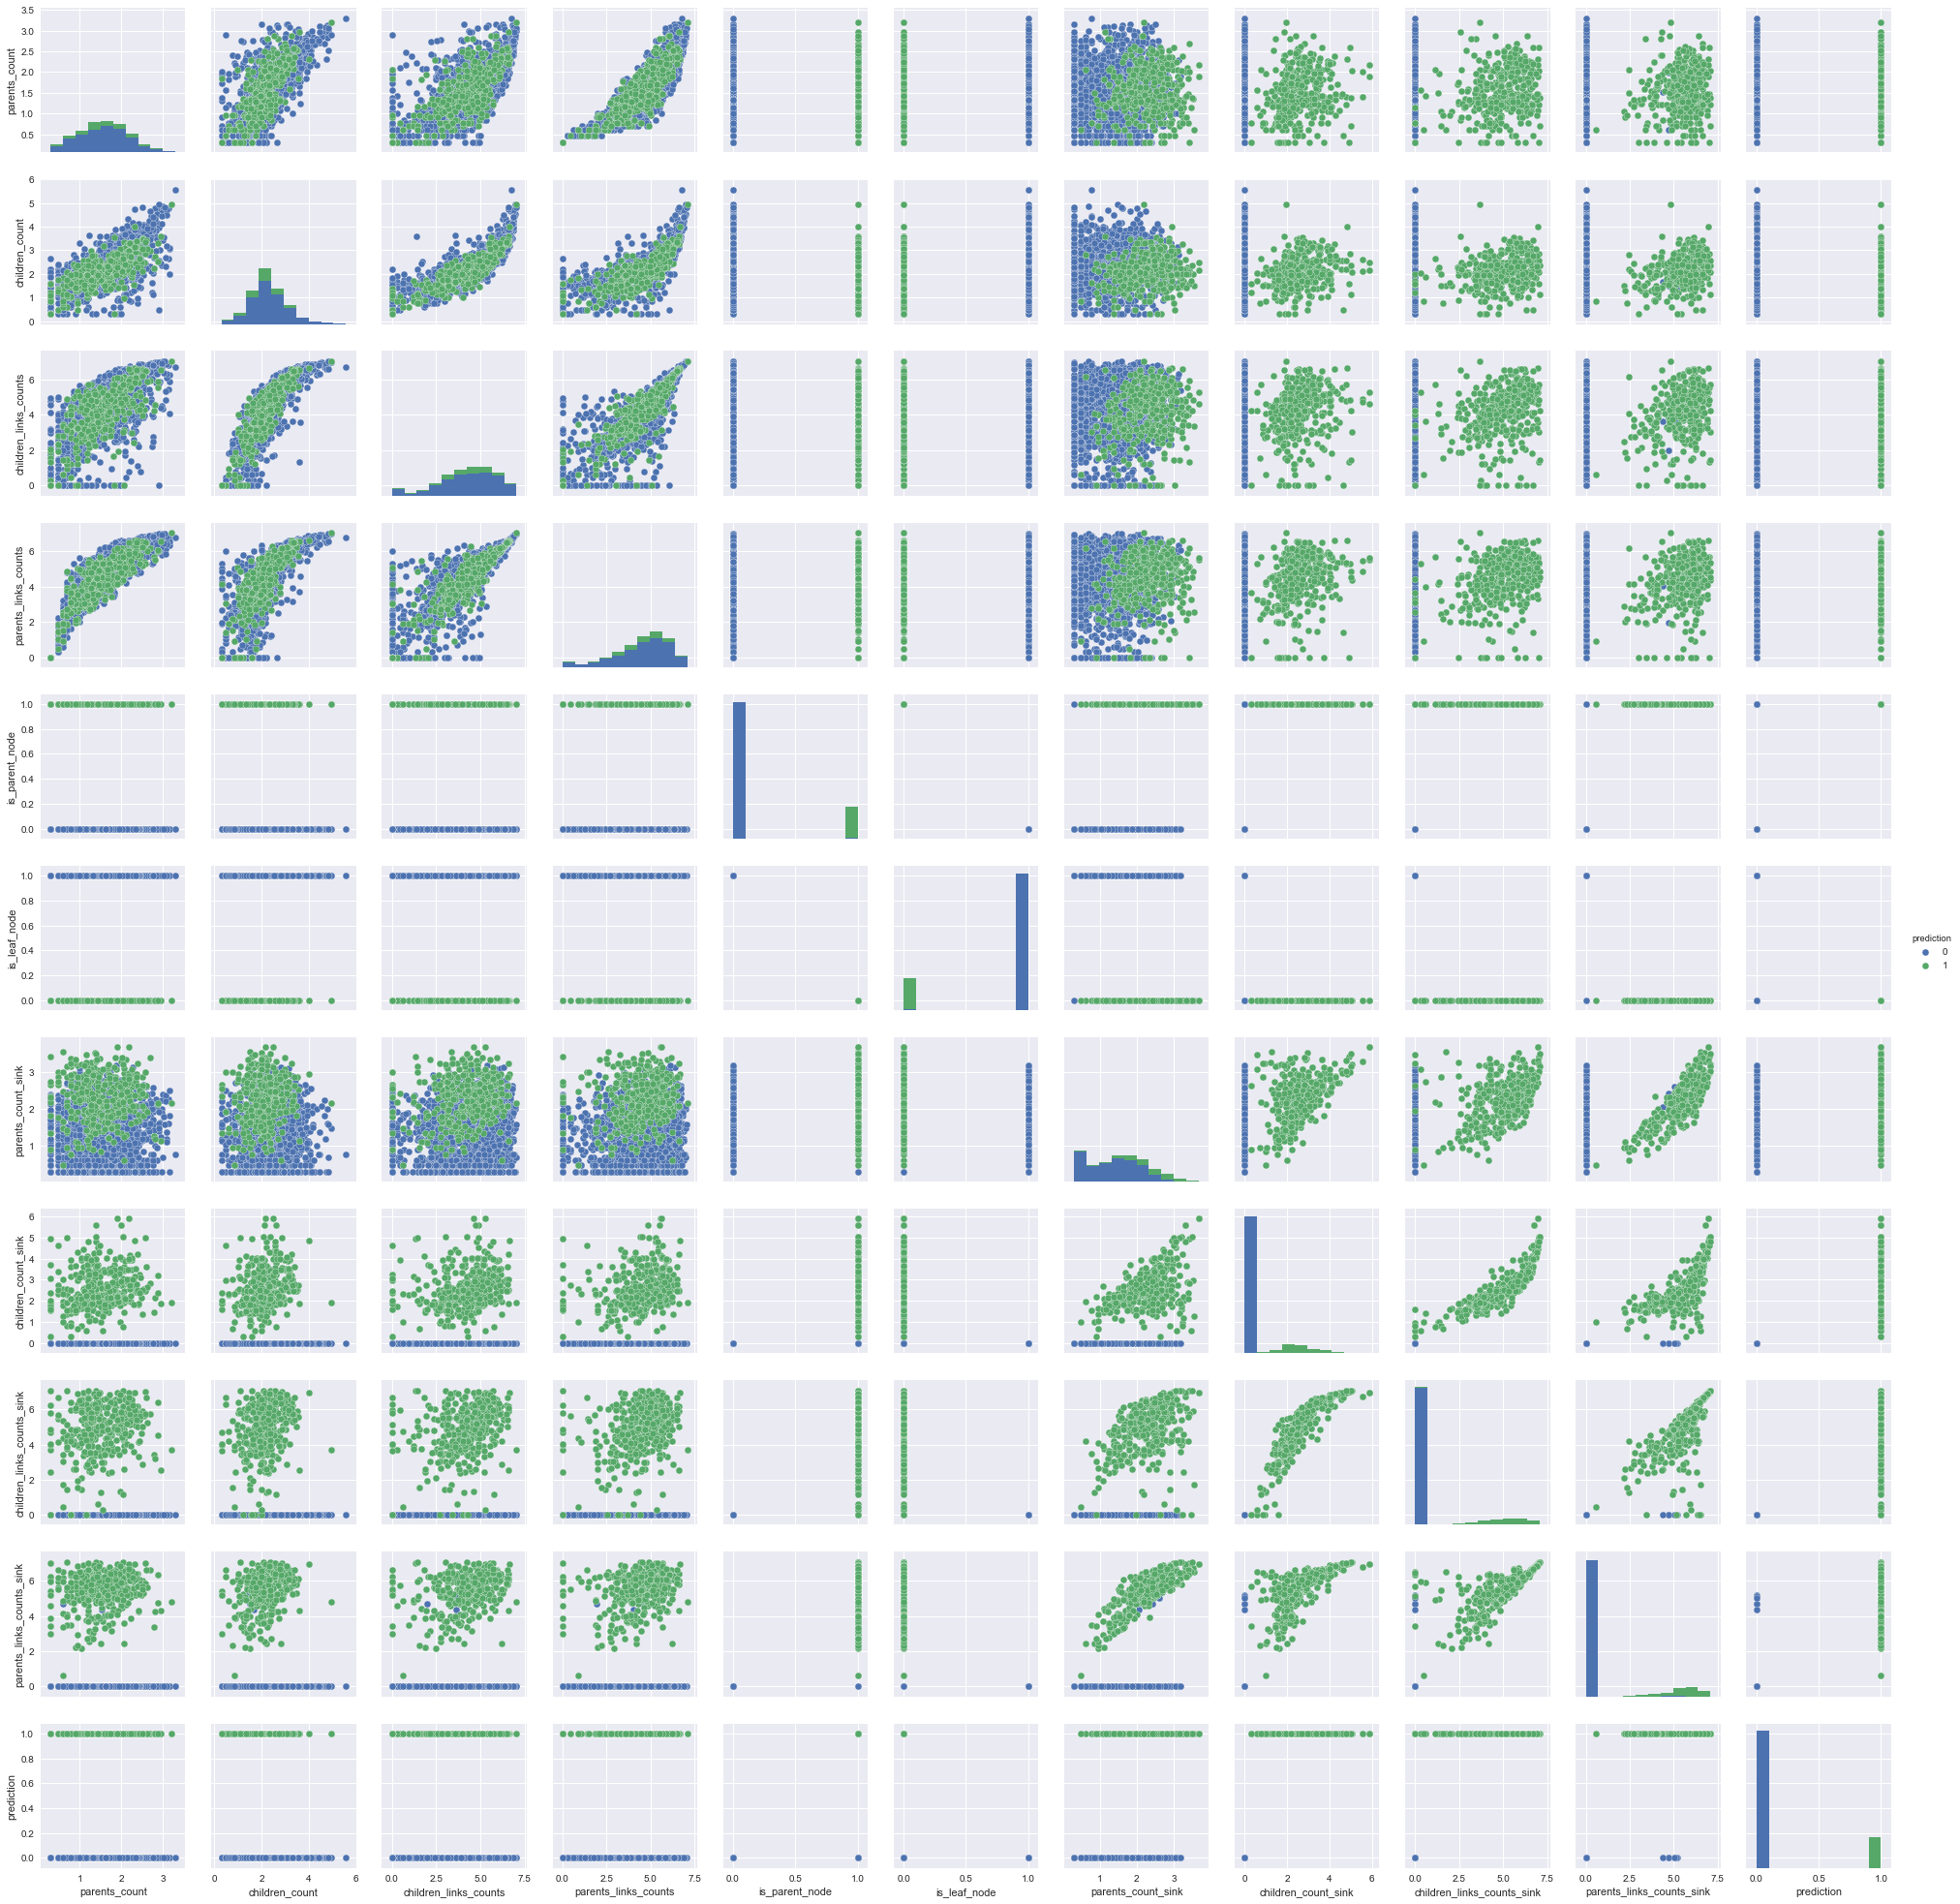

In [112]:
sns.pairplot(train_df, hue='prediction', )

In [119]:
mask = train_df.parents_count_sink > 1.5

In [120]:
train_df[mask].prediction.sum()

327

# Predictions Submission

In [125]:
train_df['prediction'] = 0
#train_df['prediction'] = mask.astype(int)
train_df.loc[mask, 'prediction'] = 1
train_df.reset_index()[['Id','prediction']].to_csv('prediction.csv', index=False)
train_df.prediction.sum()

1034

In [126]:
train_df.reset_index()[['Id','prediction']]

,Id,prediction
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,0
8,9,1
9,10,0


In [ ]:
mask = data.Source.isin(test_set) | data.Sink.isin(test_set)
data = data[mask]
mask.sum()

In [ ]:
data.head()

In [ ]:
data['is_train_set'] = 1
data['Id'] = range(2001, 2001 + data.shape[0], 1)

In [ ]:
public_test_df['is_train_set'] = 0

In [ ]:
df = pd.concat([public_test_df, data], axis=0)

In [ ]:
df.head()

In [ ]:
child_count = lambda x: node_child_counts[x] if x in node_child_counts.keys() else 0
df['source_childs_count'] = df.Source.apply(child_count).clip(upper=1000)
df['sink_childs_count'] = df.Sink.apply(child_count).clip(upper=1000)

In [ ]:
def intersect(vector):
    if vector['Sink'] not in node_child_sets.keys():
        return 0
    set1 = node_child_sets[vector['Source']]
    set2 = node_child_sets[vector['Sink']] 
    return len(set1.intersection(set2))
df['source_sink_child_intersect_count'] = df.apply(intersect, axis=1)

In [ ]:
df[df.source_childs_count > 0]

In [ ]:
sns.pairplot(df.ix[:4000, 3:], hue='is_train_set', size=4)

In [ ]:
df.Source.value_counts().head()

Intersection of source nodes Kaggge Test Set and Train Data Source Node Set

In [ ]:
len(source_set.intersection(set(data.source.values)))

In [ ]:
len(sink_set.intersection(set(data.sink.values)))

In [ ]:
public_test_df.head()

In [ ]:
df = data.source

In [ ]:
df.dropna()

In [ ]:
len(set(data.source.values).intersection(set(data.sink.values)))

In [ ]:
data.groupby('source')['sink'].count()

# Predictions

In [ ]:
predictions = pd.read_csv('data/sample.csv')
predictions['Prediction'] = 0

In [ ]:
predictions.to_csv('prediction.csv', index=False)

In [ ]:
df['prediction'] = (df['source_childs_count'] > 200).astype(int)
df[df.Id <= 2000][['Id', 'prediction']].to_csv('prediction.csv', index=False)